In [1]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import random
from ipywidgets import interact, interactive, IntSlider, ToggleButtons, fixed
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2

In [35]:
TRAIN_PATH = "/home/annop/HCC-sc/train/"
TEST_PATH = "/home/annop/HCC-sc/test/"
CLASS_MAP = {'0':'building', '1':'forests', '2':'glacier', '3':'mountain', '4':'sea', '5':'street'}

In [36]:
lookup = pd.read_csv('/home/annop/HCC-sc/lookup.csv')

In [37]:
lookup['image_path'] = TRAIN_PATH + lookup['image_name']

In [47]:
lookup['class'] = lookup['label'].apply(lambda x : CLASS_MAP.get(str(x)))

[Text(0, 0, '3037'),
 Text(0, 0, '2957'),
 Text(0, 0, '2883'),
 Text(0, 0, '2784'),
 Text(0, 0, '2745'),
 Text(0, 0, '2628')]

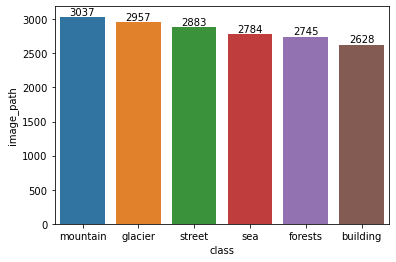

In [55]:
df_type = lookup.groupby(by='class').count()['image_path'].to_frame().reset_index().sort_values(by='image_path', ascending=False)
ax = sns.barplot(x="class", y="image_path", data=df_type)
ax.bar_label(ax.containers[0])

In [110]:
def plot_samples_images(df, mode='train', n_samples=20):
    if n_samples % 4 != 0 :
        raise ValueError('n_samples should be divisible by 4')
        
    if mode == 'train':
        train_imgs = glob("/home/annop/HCC-sc/train/*")
        im_path = random.sample(train_imgs, n_samples)
    
    elif mode == 'test':
        test_imgs = glob("/home/annop/HCC-sc/train/*")
        im_path = random.sample(test_imgs, n_samples)
    
    image_data = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in im_path]
    image_data = [cv2.resize(im, (150,150), cv2.INTER_AREA) for im in image_data]
    fig = plt.figure(figsize=(15., 15.))
    grid = ImageGrid(fig, 111,  
                     nrows_ncols=(n_samples // 4, 4),
                     axes_pad=0.3
                     )
    labels = [df[df['image_name'] == path.split('/')[-1]]['class'].values[0] for path in im_path]
    for index, (ax, im) in enumerate(zip(grid, image_data)):
        ax.imshow(im, cmap='gray')
        ax.title.set_text(labels[index])

    plt.show()
    

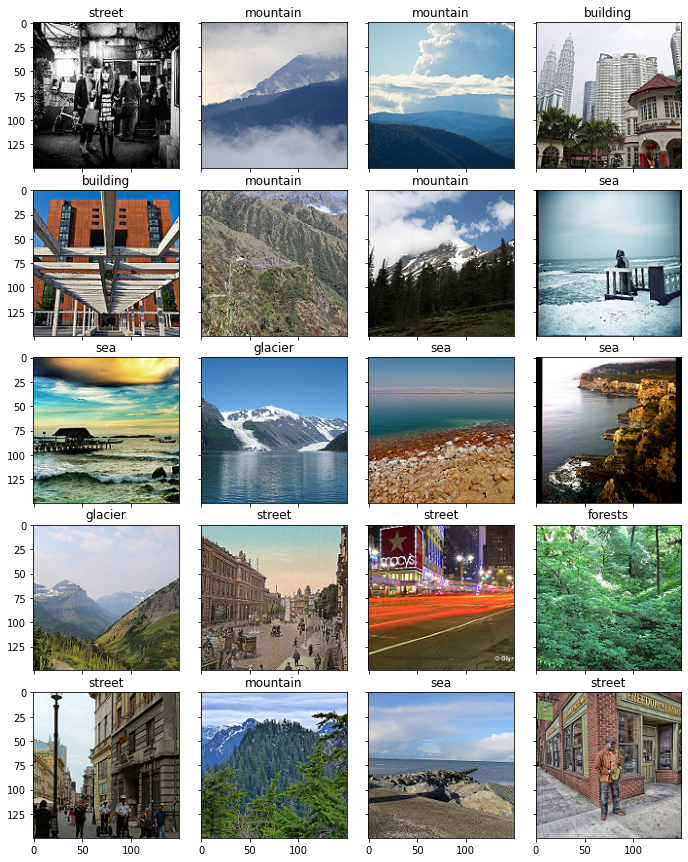

In [111]:
plot_samples_images(lookup)